In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("Asteroid_Updated.csv")

df.head(5)

C:\Users\abhia\AppData\Local\Temp\ipykernel_13348\2669705219.py:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Asteroid_Updated.csv")


name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

In [3]:
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [5]:
toDrop = ['name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T']
df.drop(toDrop, inplace = True, axis = 1)

df.drop(df[df['diameter'].isnull()].index,inplace = True)

In [6]:
df.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

In [7]:
df.drop(df[df['albedo'].isnull()].index,inplace = True)
df.drop(df[df['data_arc'].isnull()].index,inplace = True)
df.drop(df[df['H'].isnull()].index,inplace = True)

In [8]:
df.shape

(136005, 21)

In [9]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [10]:
df = df.drop(['condition_code'],axis=1)

In [11]:
df['diameter'] = df['diameter'].astype('float')

C:\Users\abhia\AppData\Local\Temp\ipykernel_13348\357754966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

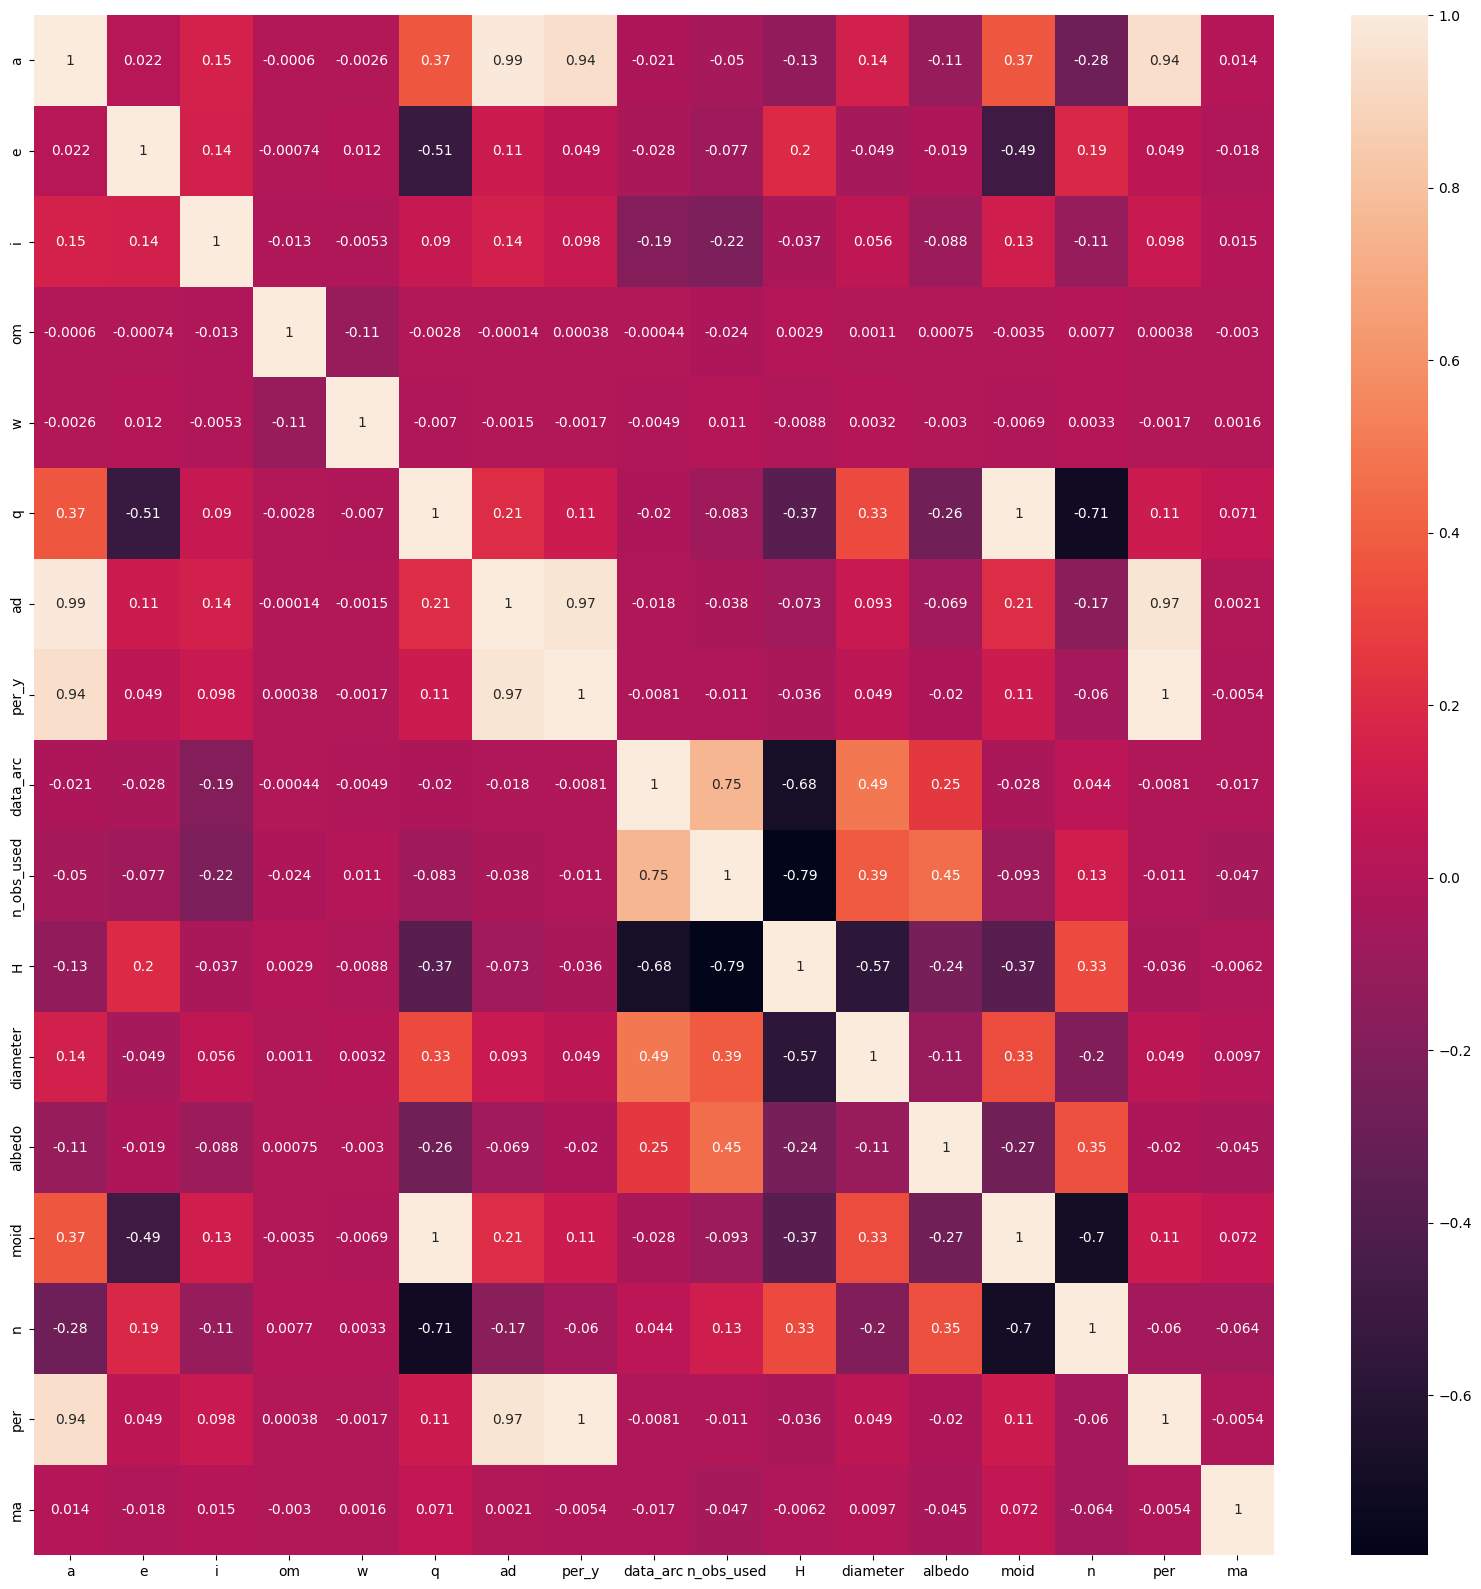

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

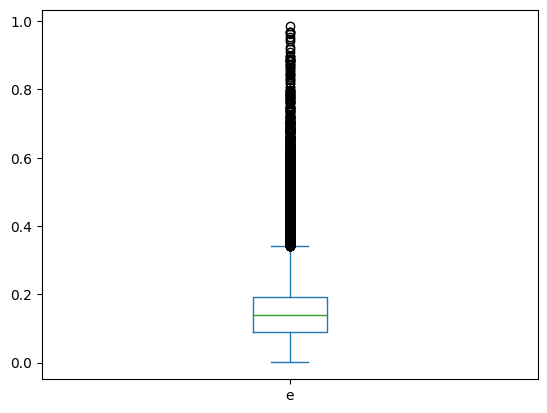

In [13]:
df.e.plot(kind="box")

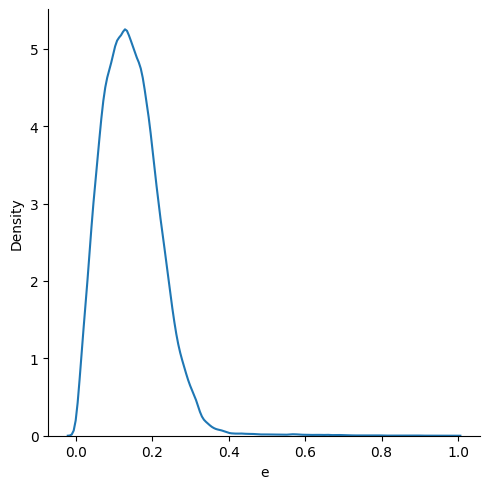

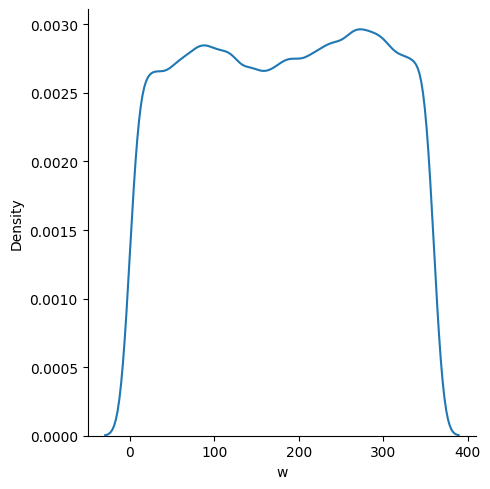

In [14]:
sns.displot(df,x='e',kind='kde')
sns.displot(df,x='w',kind='kde')

<AxesSubplot: xlabel='diameter', ylabel='n_obs_used'>

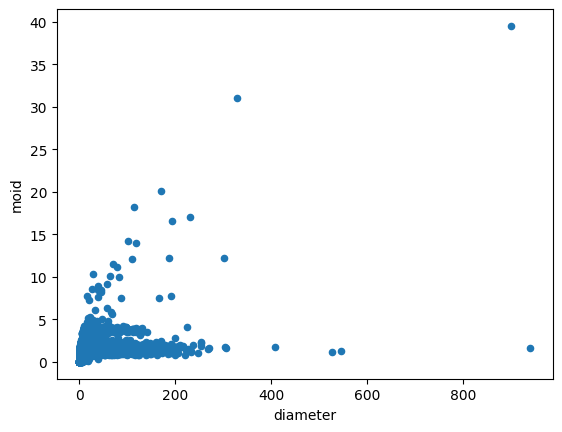

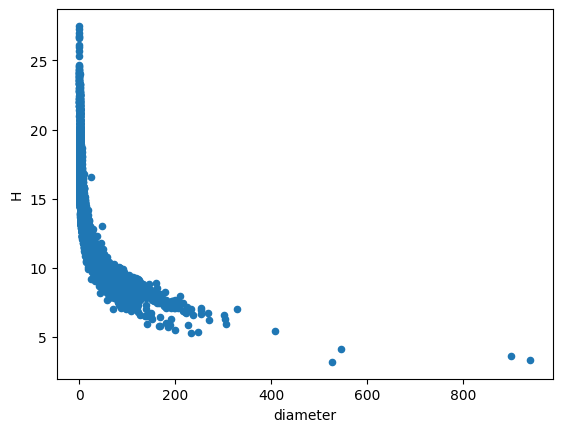

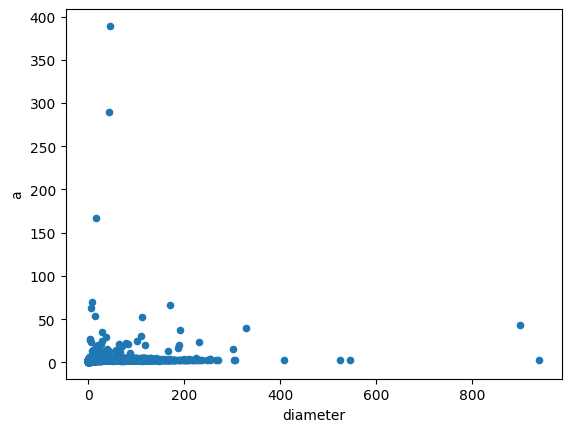

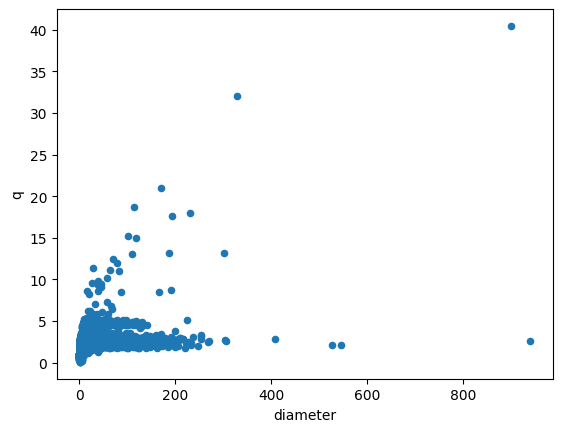

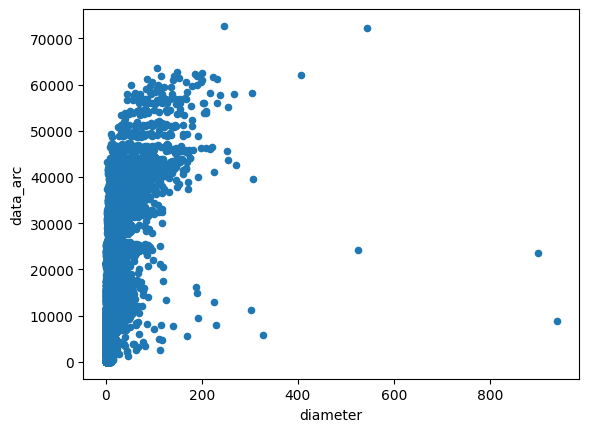

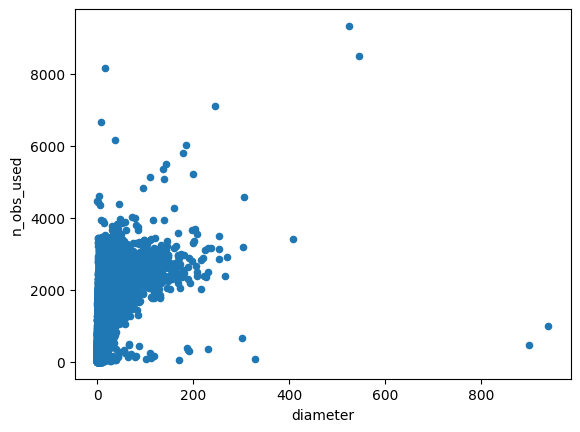

In [15]:
df.plot(kind = 'scatter', x = 'diameter', y = 'moid')
df.plot(kind = 'scatter', x = 'diameter', y = 'H')
df.plot(kind = 'scatter', x = 'diameter', y = 'a')
df.plot(kind = 'scatter', x = 'diameter', y = 'q')
df.plot(kind = 'scatter', x = 'diameter', y = 'data_arc')
df.plot(kind = 'scatter', x = 'diameter', y = 'n_obs_used')

In [16]:
o1=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [17]:
df['neo']=o1.fit_transform(df[['neo']])
df['pha']=o1.fit_transform(df[['pha']])

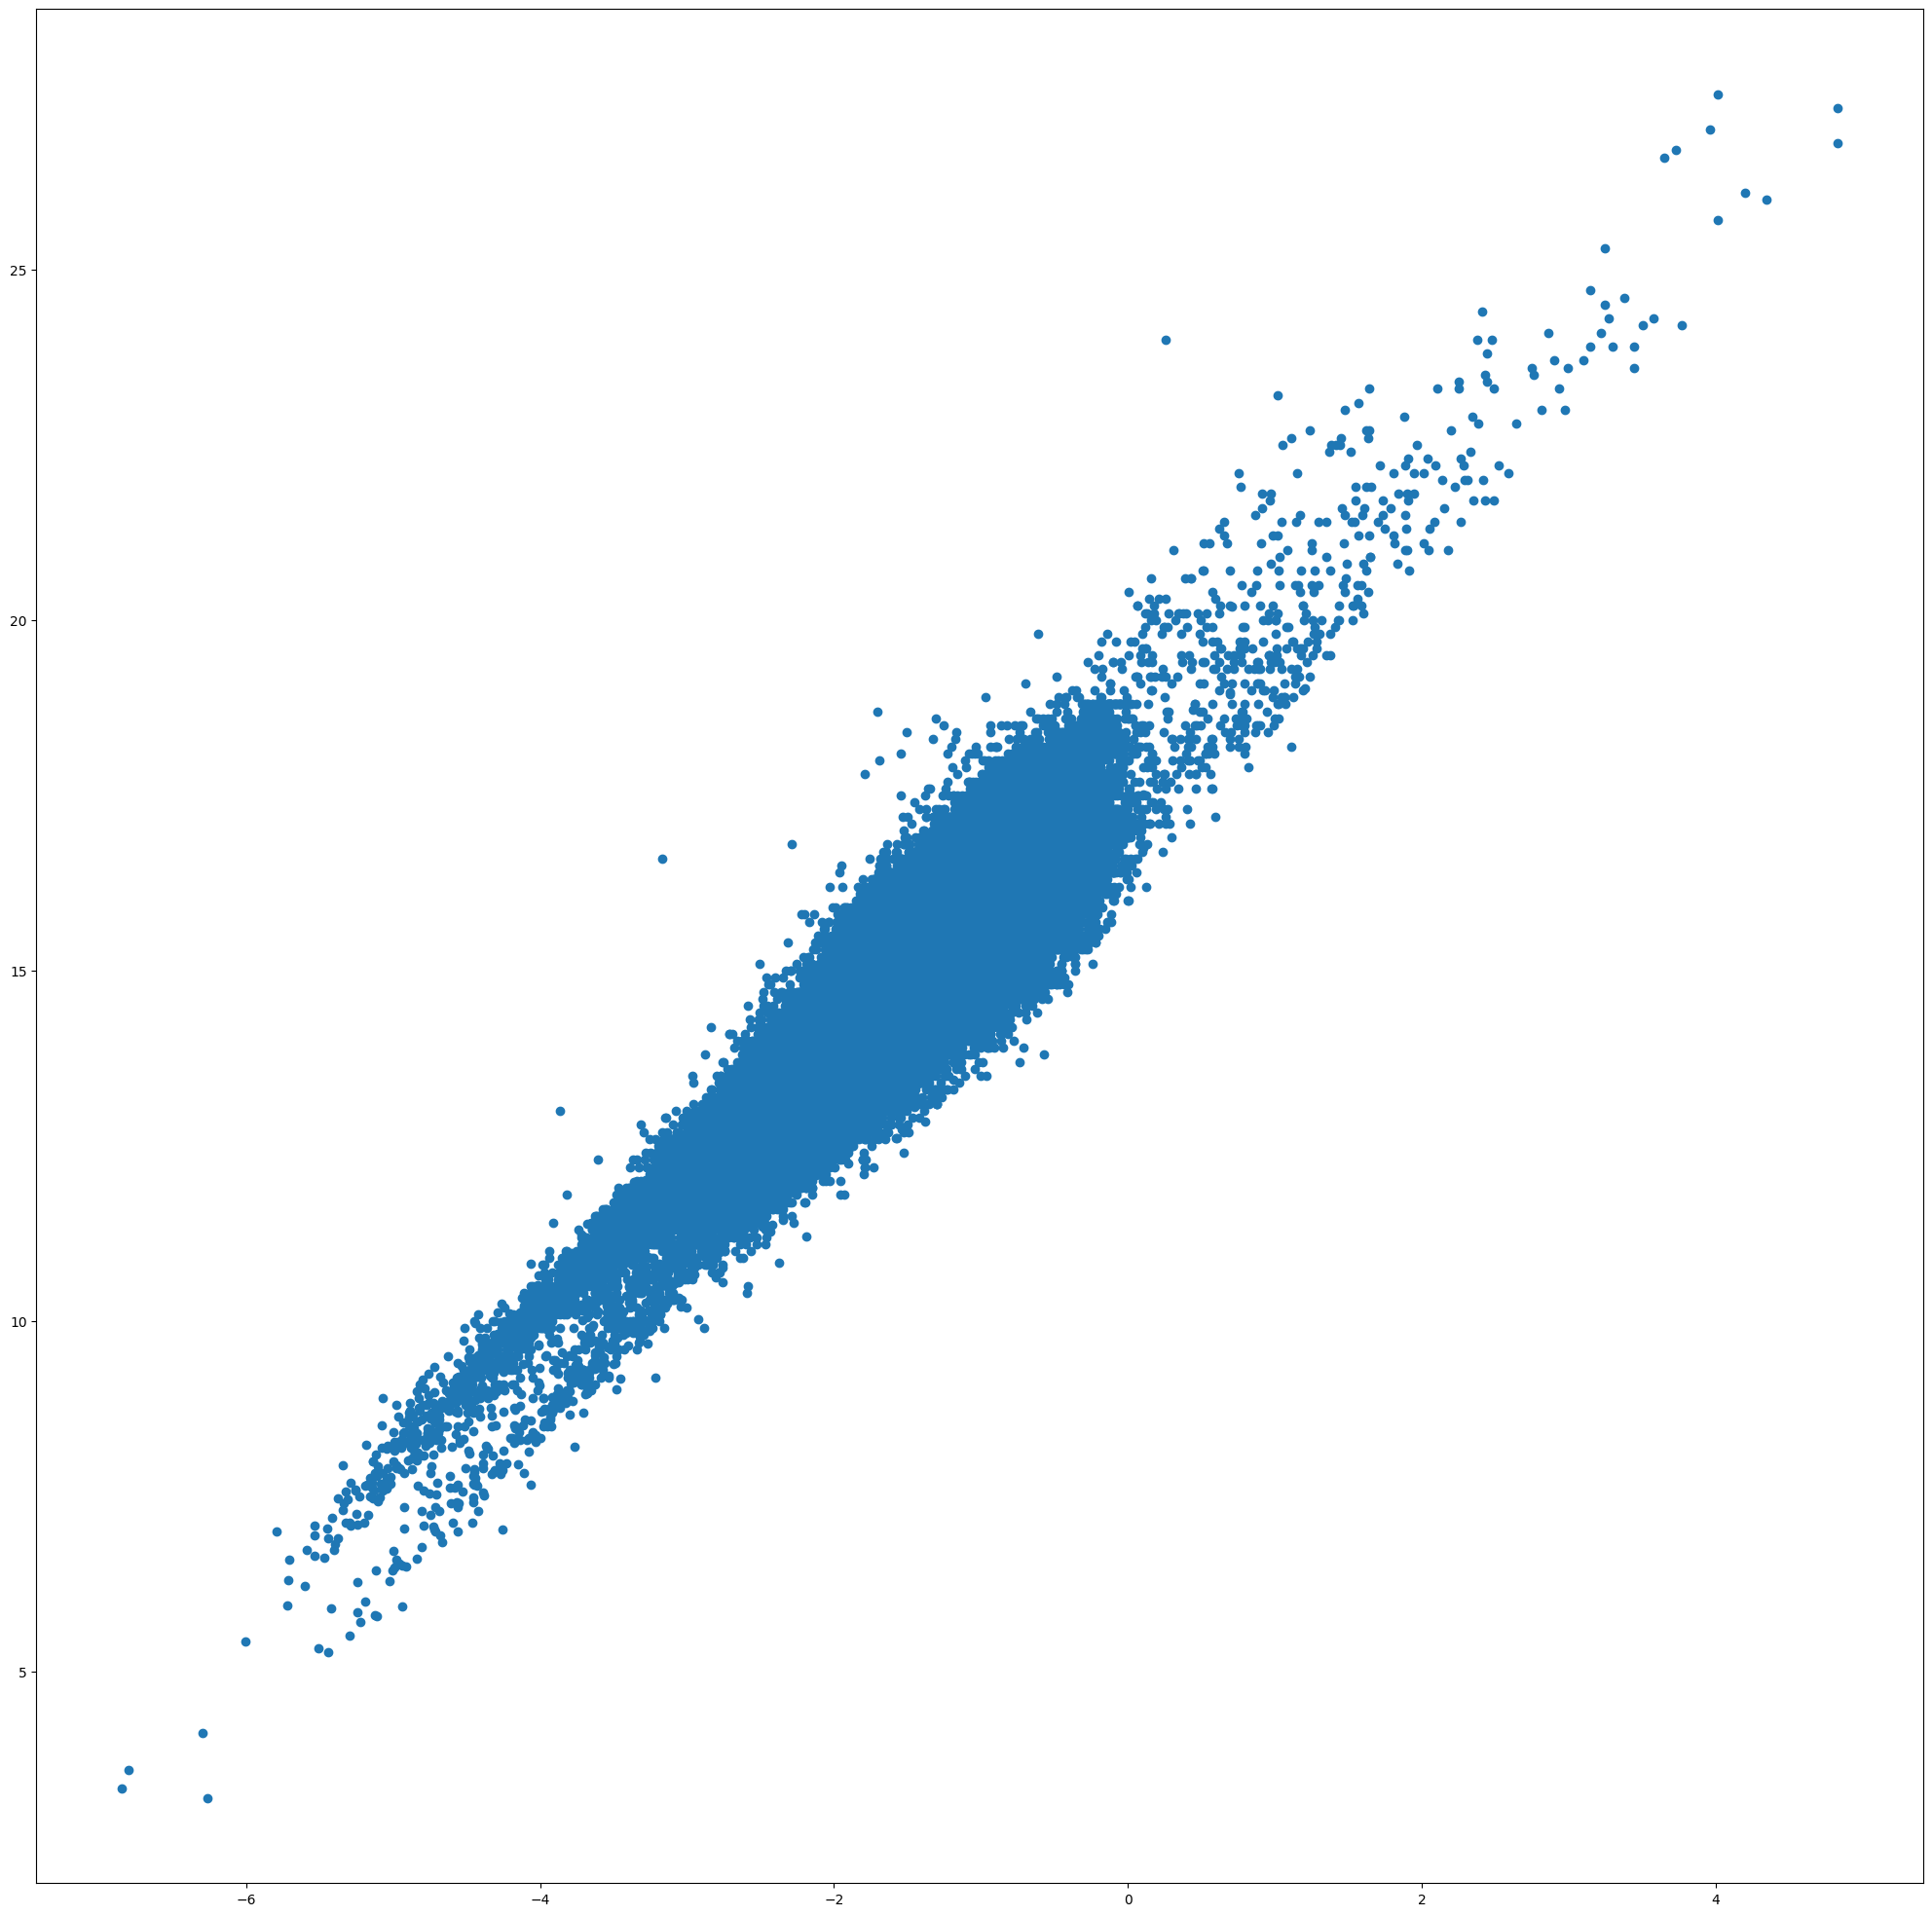

In [18]:
plt.figure(figsize=(25,25))
plt.scatter(-np.log(df['diameter']),df['H'])

<AxesSubplot: xlabel='diameter', ylabel='new_H'>

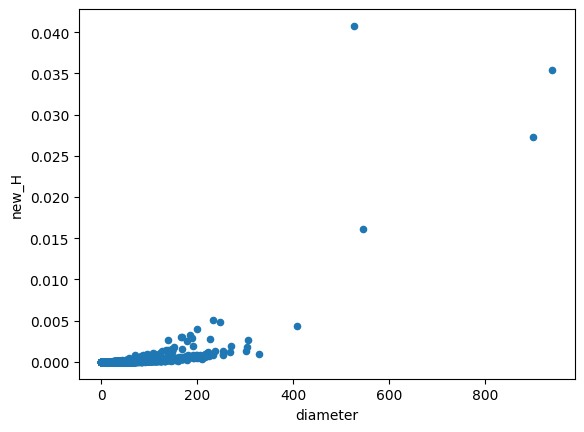

In [19]:
df=df.assign(new_H=lambda x: np.e**(-x.H))
df.plot(kind = 'scatter', x = 'diameter', y = 'new_H')

In [20]:
df.isna().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
neo           0
pha           0
diameter      0
albedo        0
moid          0
class         0
n             0
per           0
ma            0
new_H         0
dtype: int64

In [21]:
df.nunique()

a             136005
e             136005
i             136005
om            136005
w             136005
q             136005
ad            136005
per_y         136005
data_arc       18546
n_obs_used      3129
H                715
neo                2
pha                2
diameter       16596
albedo          1057
moid           94012
class             11
n             136005
per           136005
ma            136005
new_H            715
dtype: int64

new_H and H have only 763 unique values(< 1%), but they do not look like categorical values.
Hence we will not consider these parameters

Since neo and pha are categorical values we will consider these 2 columns

# Data is ready for EDA
a- semi major axis

e-eccentricity

i- inclination with respect to x-y elliptical plane

om - longitude of the ascending node

w- argument of perihelion

q - perihelion distance

ad - aphelion distance

per_y - orbital period

data_Arc - data arc span(d)

condition_Code = orbit condition code

n_obs_used - number of observation used

H - absolute magnitude parameter

neo-Near earth object

pha - Physically hazardous object

diameter - diameter of asteroids

In [22]:
from scipy.stats import spearmanr


for i in df.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(df[i], df['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5715444233309472
corelation of  e = -0.14699241689425513
corelation of  i = 0.13966960641719636
corelation of  om = 0.0012190547329347767
corelation of  w = 0.005496147227587065
corelation of  q = 0.5239887993995656
corelation of  ad = 0.48531937558112187
corelation of  per_y = 0.5715444233309472
corelation of  data_arc = 0.369289018561192
corelation of  n_obs_used = 0.42420980755855414
corelation of  H = -0.7448603259499111
corelation of  neo = 0.11688856068299783
corelation of  pha = 0.06184667811056527
corelation of  diameter = 1.0
corelation of  albedo = -0.27155506188713335
corelation of  moid = 0.528976781448191
corelation of  n = -0.5715444233309472
corelation of  per = 0.5715444233309472
corelation of  ma = 0.03225873563931425
corelation of  new_H = 0.7448603259499111


### Till now, We have seen:
Diameter depends on

    a: semi major axis
    
    data_arc: data arc span(d)
    
    q: perihelion distance

Columns correlated till data_arc

In [23]:
df['neg']=-0.14*df['e']+0.26*df['albedo']
df['pos']=0.13*df['i']+0.0014*df['om']+0.005*df['w']+0.032*df['ma']+0.37*df['data_arc']
df.drop(['e','albedo'],axis=1,inplace=True)
df.drop(['i','om','w','ma','data_arc'],axis=1,inplace=True)

In [24]:
for i in df.select_dtypes(['float64' , 'int64']):
   coef, p = spearmanr(df[i], df['diameter'])
   print("corelation of ",i,'=',coef)

corelation of  a = 0.5715444233309472
corelation of  q = 0.5239887993995656
corelation of  ad = 0.48531937558112187
corelation of  per_y = 0.5715444233309472
corelation of  n_obs_used = 0.42420980755855414
corelation of  H = -0.7448603259499111
corelation of  neo = 0.11688856068299783
corelation of  pha = 0.06184667811056527
corelation of  diameter = 1.0
corelation of  moid = 0.528976781448191
corelation of  n = -0.5715444233309472
corelation of  per = 0.5715444233309472
corelation of  new_H = 0.7448603259499111
corelation of  neg = -0.18927636919635968
corelation of  pos = 0.36984980502640696


Columns greater than 30% relation are
q, 
data_arc, 
n_obs_used, 
H, 
moid, 
new_H

Diameter depends on a, data_arc, q, new_H, moid, H, n_obs_used

In [25]:
df["neo"]=df["neo"].replace({'Y':1,'N':0})
df["pha"]=df["pha"].replace({'Y':1,'N':0})
df_1=['n']
df[df_1]=-1*df[df_1]

In [26]:
df=df.drop(['class'],axis=1)

## Now Implementing Different Models

Splitting the dataset into train and test

In [27]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [28]:
from keras.models import Sequential
from keras.layers import Dense


In [29]:
model = Sequential([
	Dense(14, input_shape=(14,), kernel_initializer='normal', activation='relu'),
	Dense(28, kernel_initializer='normal', activation='relu'),
	Dense(1, kernel_initializer='normal')
   ])

In [30]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
x =df.drop(['diameter'],axis=1)

In [32]:
x_y=df['diameter']
x=x.dropna()
x_y=x_y.dropna()

In [33]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
arc_scale = min_max_scaler.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
arc_train, arc_val_and_test, arc_y_train, arc_y_val_and_test = train_test_split(arc_scale, x_y, test_size=0.3)

In [36]:
arc_val, arc_test, arc_y_val, arc_y_test = train_test_split(arc_val_and_test, arc_y_val_and_test, test_size=0.5)

In [37]:
hist = model.fit(arc_train, arc_y_train,
          batch_size=100, epochs=20,
          validation_data=(arc_val, arc_y_val))

Epoch 1/20
953/953 [==============================] - 2s 1ms/step - loss: 78.5468 - val_loss: 101.5832
Epoch 2/20
953/953 [==============================] - 1s 1ms/step - loss: 47.0467 - val_loss: 85.9712
Epoch 3/20
953/953 [==============================] - 1s 1ms/step - loss: 37.5677 - val_loss: 74.4166
Epoch 4/20
953/953 [==============================] - 1s 1ms/step - loss: 29.8209 - val_loss: 65.2074
Epoch 5/20
953/953 [==============================] - 1s 1ms/step - loss: 24.2451 - val_loss: 58.1986
Epoch 6/20
953/953 [==============================] - 1s 1ms/step - loss: 20.4679 - val_loss: 52.7357
Epoch 7/20
953/953 [==============================] - 1s 1ms/step - loss: 17.2793 - val_loss: 47.5387
Epoch 8/20
953/953 [==============================] - 1s 1ms/step - loss: 14.6273 - val_loss: 43.1719
Epoch 9/20
953/953 [==============================] - 1s 1ms/step - loss: 12.7667 - val_loss: 40.1916
Epoch 10/20
953/953 [==============================] - 1s 1ms/step - loss: 11.346

In [38]:
model.evaluate(arc_test, arc_y_test)

638/638 [==============================] - 1s 1ms/step - loss: 4.4955


4.495530128479004

In [39]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(arc_y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(arc_y_test,prediction, c='orange',label='predictions')
    ax2.plot(arc_y_test,arc_y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated diameter')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale 
def score(prediction):
    score = r2_score(prediction,arc_y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))

### Random Forest Algo

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=22, n_estimators=50)


forest.fit(arc_train,np.ravel(arc_y_train))


arc_y_pred_forest = forest.predict(arc_test)


score_forest = score(arc_y_pred_forest)
announce(score_forest)

The R^2 score achieved using this regression is: 0.97


In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

### Linear Regression

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train,Y_train)


Y_pred_lr = lr.predict(X_test)


score_lr = r2_score(Y_pred_lr,Y_test)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : -0.0
rms value for the regression  : 14440283773.985


C:\Users\abhia\AppData\Local\Temp\ipykernel_13348\2286139865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.values,label='test values', ax=ax1)
C:\Users\abhia\AppData\Local\Temp\ipykernel_13348\2286139865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred_lr ,label='predictio

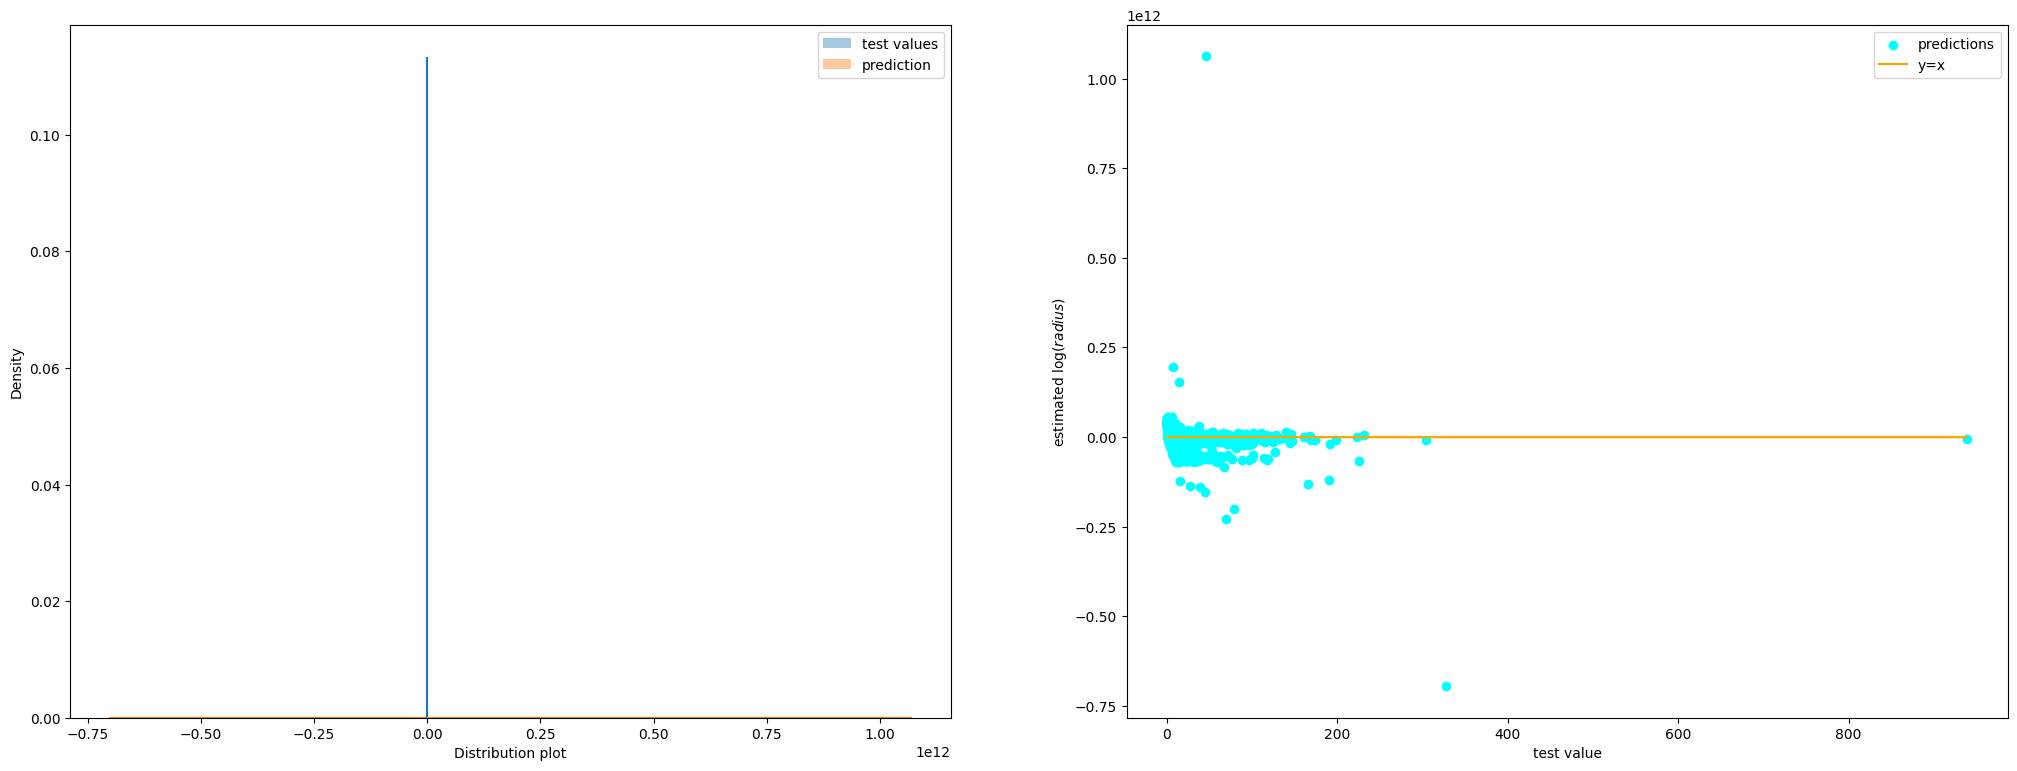

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### XG Boost

In [44]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)


xgReg.fit(X_train,Y_train)


Y_pred_xgb = xgReg.predict(X_test)


score_xgb = r2_score(Y_pred_xgb,Y_test)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.842
rms value for the regression  : 3.548


In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [60]:
class NeuralNet():
  def __init__(self, layers=[14,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
  def init_weights(self):
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
  def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))
  def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss
  def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)
  def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = Z2
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
  def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.params['Z1']
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
  def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
  def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = Z1
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)
  def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

In [61]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {Y_train.shape}")
print(f"Shape of test labels is {Y_test.shape}")

Shape of train set is (108804, 14)
Shape of test set is (27201, 14)
Shape of train label is (108804,)
Shape of test labels is (27201,)


In [62]:
nn = NeuralNet() # create the NN model
nn.fit(X_train, Y_train) #train the model

MemoryError: Unable to allocate 88.2 GiB for an array with shape (108804, 108804) and data type float64